<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Proyecto_analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos librerías 

In [ ]:
###Importar librerías 
#Procesamiento de datos
import numpy as np
import pandas as pd


#Procesamiento y modelado 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#Graficas 

import seaborn as sb
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Extracción de datos

In [ ]:
##Extraemos los datos 

datos = pd.read_csv('Consumer_Complaints.csv')
datos.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670598 entries, 0 to 670597
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 670598 non-null  object
 1   Product                       670598 non-null  object
 2   Sub-product                   472396 non-null  object
 3   Issue                         670598 non-null  object
 4   Sub-issue                     269868 non-null  object
 5   Consumer complaint narrative  114704 non-null  object
 6   Company public response       145197 non-null  object
 7   Company                       670598 non-null  object
 8   State                         665293 non-null  object
 9   ZIP code                      665274 non-null  object
 10  Tags                          94730 non-null   object
 11  Consumer consent provided?    208151 non-null  object
 12  Submitted via                 670598 non-null  object
 13 

In [ ]:
datos.groupby(['Product']).count()

,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Product,,,,,,,,,,,,,,,,,
Bank account or service,76084,76084,76084,0,10425,18113,76084,74707,74707,10357,16887,76084,76084,76084,76084,71642,76084
Consumer Loan,26604,26604,26604,0,6394,5700,26604,26444,26443,4412,10513,26604,26604,26604,26604,24707,26604
Credit card,79007,0,79007,0,13582,15283,79007,78335,78336,11890,23006,79007,79007,79007,79007,75259,79007
Credit reporting,119195,0,119195,119195,22202,40255,119195,118669,118665,15130,49115,119195,119195,119195,119195,109039,119195
Debt collection,124236,124236,124236,124236,28861,27873,124236,123488,123479,20746,50054,124236,124236,124236,124236,114668,124236
Money transfers,4720,4720,4720,0,1074,509,4720,4540,4540,924,1697,4720,4720,4720,4720,4425,4720
Mortgage,210324,210324,210324,0,24641,33028,210324,208905,208900,28275,44233,210324,210324,210324,210324,201416,210324
Other financial service,806,806,806,0,176,282,806,788,787,163,319,806,806,806,806,699,806
Payday loan,4786,4786,4786,4786,1245,840,4786,4765,4765,794,2141,4786,4786,4786,4786,4292,4786


In [ ]:
conditionlist = [
    (datos['Product']=='Bank account or service') ,
    (datos['Product']=='Consumer Loan'),
    (datos['Product']=='Credit card'),
    (datos['Product']=='Credit reporting'),
    (datos['Product']=='Debt collection'),
    (datos['Product']=='Money transfers'),
    (datos['Product']=='Mortgage'),
    (datos['Product']=='Other financial service'),
    (datos['Product']=='Payday loan'),
    (datos['Product']=='Prepaid card'),
    (datos['Product']=='Student loan'),
    (datos['Product']=='Virtual currency')]
choicelist = [1,2,3,4,5,6,7,8,9,10,11,12]
datos['Product_cod'] = np.select(conditionlist, choicelist)

In [ ]:
datos.describe()

,Complaint ID,Product_cod
count,6.705980e+05,670598.000000
mean,1.145473e+06,4.897751
std,6.468630e+05,2.340737
min,1.000000e+00,1.000000
25%,5.930575e+05,3.000000
50%,1.174558e+06,5.000000
75%,1.718337e+06,7.000000
max,2.218987e+06,12.000000


In [ ]:
datos.describe(include='object')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
count,670598,670598,472396,670598,269868,114704,145197,670598,665293,665274,94730,208151,670598,670598,670598,670598,629179
unique,1818,12,47,95,68,112690,10,3933,62,27889,3,4,6,1767,8,2,2
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,I am filing this complaint because Experian ha...,Company has responded to the consumer and the ...,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No
freq,963,210324,81715,106455,32633,102,57364,61720,97640,2147,54881,114704,446035,1108,493981,652848,496466


# Entendimiento de los datos 

# Datos vacíos

In [ ]:
#Configurar los gráficos
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [ ]:
datosVacios=datos.isna().sum()

In [ ]:
#Total de datos vacíos en el dataset
print(f"El total de registros vacíos en el dataset es:{sum(datosVacios)}")

El total de registros vacíos en el dataset es:2770590


In [ ]:
eje_y=['Date received','Product','Sub-product','Issue','Sub-issue','Consumer complaint narrative','Company public response','Company','State','ZIP code','Tags','Consumer consent provided?','Submitted via','Date sent to company','Company response to consumer','Timely response?','Consumer disputed?','Complaint ID','Product_cod']

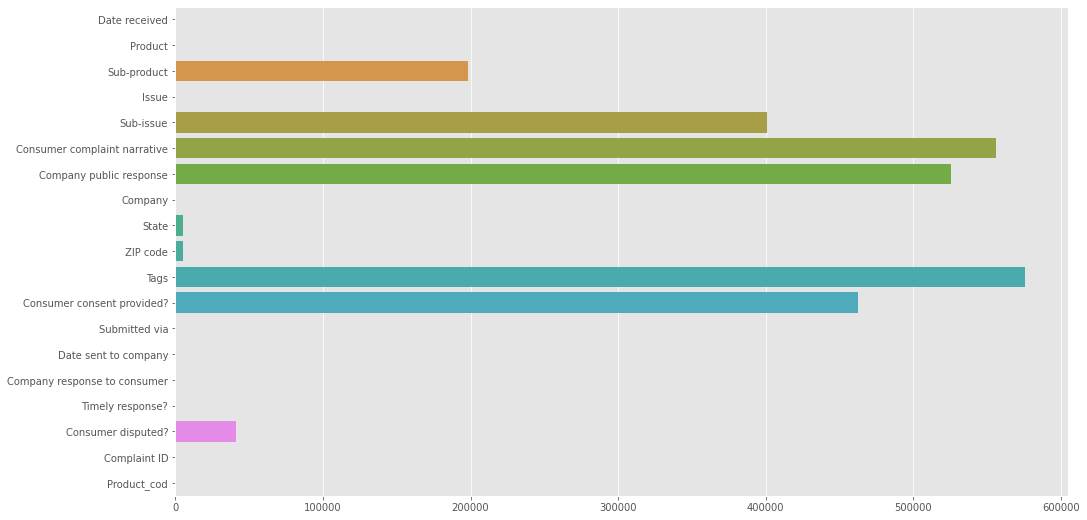

In [ ]:
sb.barplot(x=datosVacios,y=eje_y)
plt.show()

In [ ]:
##Completitud de los datos 
datosCompletos=((670598-datosVacios)/670598)*100

In [179]:
print(f"Porcentaje de completitud de los datos:\n{datosCompletos}")

Porcentaje de completitud de los datos:
Date received                   100.000000
Product                         100.000000
Sub-product                      70.443992
Issue                           100.000000
Sub-issue                        40.242888
Consumer complaint narrative     17.104733
Company public response          21.651869
Company                         100.000000
State                            99.208915
ZIP code                         99.206082
Tags                             14.126198
Consumer consent provided?       31.039609
Submitted via                   100.000000
Date sent to company            100.000000
Company response to consumer    100.000000
Timely response?                100.000000
Consumer disputed?               93.823572
Complaint ID                    100.000000
Product_cod                     100.000000
dtype: float64


# Cantidad de quejas por producto

In [ ]:
group_by_product_state=datos.groupby('Product').size()
group_by_product_state.head()

Product
Bank account or service     76084
Consumer Loan               26604
Credit card                 79007
Credit reporting           119195
Debt collection            124236
dtype: int64

In [ ]:
axe_y_types=datos['Product'].unique()

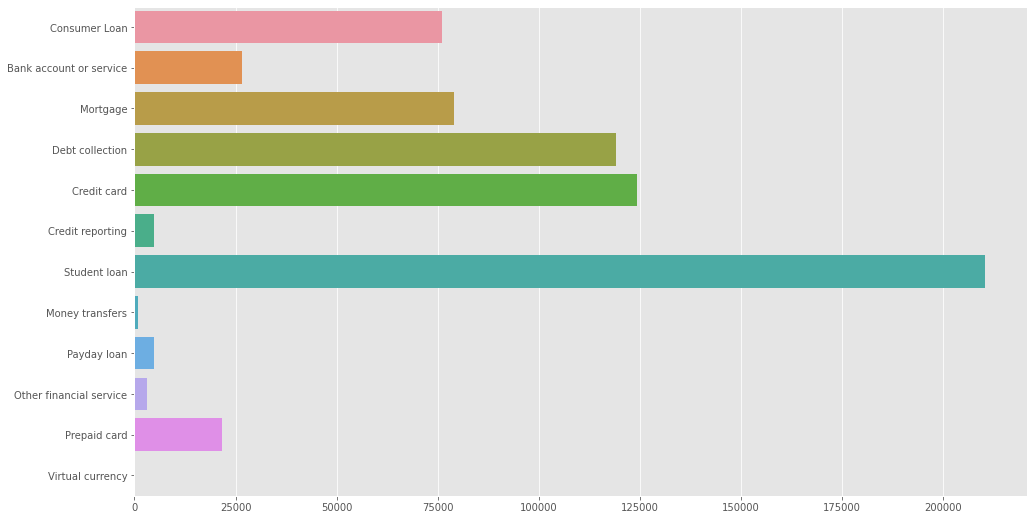

In [ ]:
sb.barplot(x=group_by_product_state,y=axe_y_types)
plt.show()

# Cantidad de quejas atendidas 

In [180]:
group_by_product_response=datos.groupby('Company response to consumer').size()
group_by_product_response.head()

Company response to consumer
Closed                              15492
Closed with explanation            493981
Closed with monetary relief         45170
Closed with non-monetary relief     84557
Closed with relief                   5298
dtype: int64

In [183]:
axe_y_response=datos['Company response to consumer'].unique()

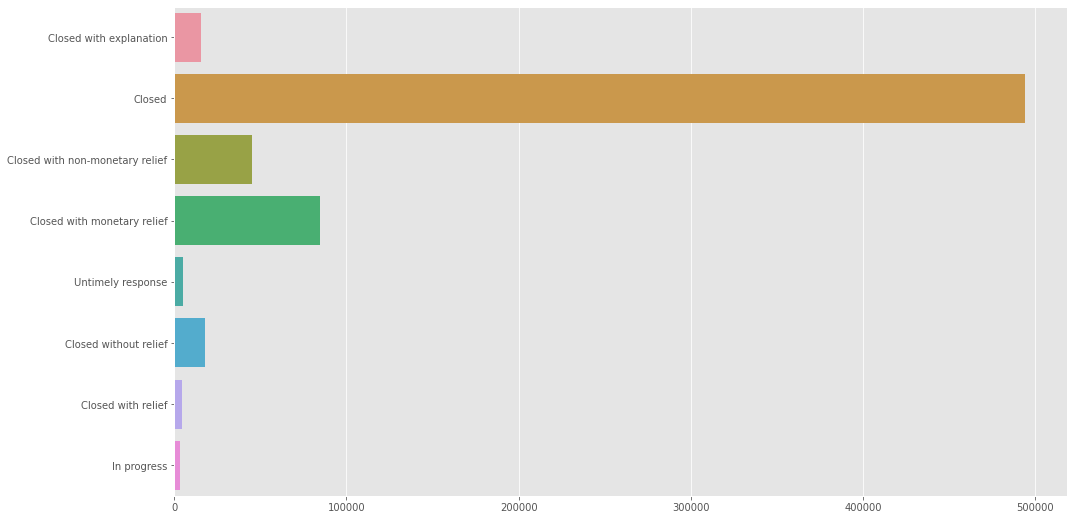

In [184]:
sb.barplot(x=group_by_product_response,y=axe_y_response)
plt.show()

# Selección de los datos a utilizar

In [ ]:
##se eliminan las columnas que no se van a utilizar 
datos=datos.drop(['Product','Complaint ID','Date sent to company','Consumer disputed?','ZIP code','Sub-product','Sub-issue','Date received','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],1)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670598 entries, 0 to 670597
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Issue                         670598 non-null  object
 1   Company                       670598 non-null  object
 2   Submitted via                 670598 non-null  object
 3   Company response to consumer  670598 non-null  object
 4   Timely response?              670598 non-null  object
 5   Product_cod                   670598 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 30.7+ MB


In [ ]:
datos.describe(include='object')

,Issue,Company,Submitted via,Company response to consumer,Timely response?
count,670598,670598,670598,670598,670598
unique,95,3933,6,8,2
top,"Loan modification,collection,foreclosure",Bank of America,Web,Closed with explanation,Yes
freq,106455,61720,446035,493981,652848


In [ ]:
#Codificar variables categóricas
catCol = datos.select_dtypes(include= ['object'] ).columns.to_list()
numCol = datos.select_dtypes(include= ['float64','int64'] ).columns.to_list()

preprocesador = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown = 'ignore'),catCol)],remainder = 'passthrough')


datospre =preprocesador.fit_transform(datos)


In [ ]:
codCat=preprocesador.named_transformers_['onehot'].get_feature_names(catCol)
labels = np.concatenate([codCat,numCol])


In [ ]:
datosProc = pd.DataFrame.sparse.from_spmatrix(datospre, columns=labels)

In [ ]:
datosProc.head()

,Issue_APR or interest rate,"Issue_Account opening, closing, or management",Issue_Account terms and changes,Issue_Adding money,Issue_Advertising and marketing,"Issue_Advertising, marketing or disclosures",Issue_Application processing delay,"Issue_Application, originator, mortgage broker",Issue_Applied for loan/did not receive money,Issue_Arbitration,...,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_In progress,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes,Product_cod
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0


In [ ]:
#definicion de variable 
x=datosProc.drop(['Product_cod'],1)
y=datosProc[['Product_cod']]

In [ ]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(x,y,train_size=0.7, random_state=123)

# Entrenamiento

In [ ]:
datosEntrenamiento = pd.concat([xEntrenamiento,yEntrenamiento],axis=1)

In [ ]:
##Modelado de datos 
modelo = LogisticRegression()
modelo.fit(xEntrenamiento,yEntrenamiento)

LogisticRegression()

In [ ]:
probabilidadPrediccion = modelo.predict_proba(xEntrenamiento)
probabilidadPrediccion

array([[5.31235790e-05, 1.48993724e-04, 1.47337046e-04, ...,
        5.84100339e-05, 2.84857809e-05, 5.54764565e-06],
       [4.70384774e-05, 9.25557435e-05, 7.11159310e-05, ...,
        1.80697584e-05, 1.71491082e-05, 4.92734706e-06],
       [1.07836091e-04, 2.81740634e-04, 9.98427499e-01, ...,
        2.84419779e-04, 2.84102213e-04, 7.56477984e-06],
       ...,
       [9.79042705e-06, 3.61013834e-06, 2.41681085e-05, ...,
        1.23295115e-05, 9.99824412e-01, 1.29862080e-06],
       [1.73000938e-06, 8.05841486e-06, 1.66461310e-05, ...,
        2.30057989e-06, 1.41477860e-06, 2.20273654e-07],
       [9.98820761e-01, 2.01523624e-04, 2.89087359e-04, ...,
        3.00371444e-05, 1.74262146e-04, 1.56124717e-05]])

In [ ]:
prediccion = modelo.predict(xEntrenamiento)
prediccion

array([ 5.,  7.,  3., ..., 11.,  4.,  1.])

In [ ]:
print('Desempeño en entrenamiento:', modelo.score(xEntrenamiento,yEntrenamiento))

Desempeño en entrenamiento: 0.9972987827479985


In [ ]:

#Matriz de confusión en entrenamiento 

matrix=confusion_matrix(y_true = yEntrenamiento,
                 y_pred=prediccion)

Text(123.0, 0.5, 'True')

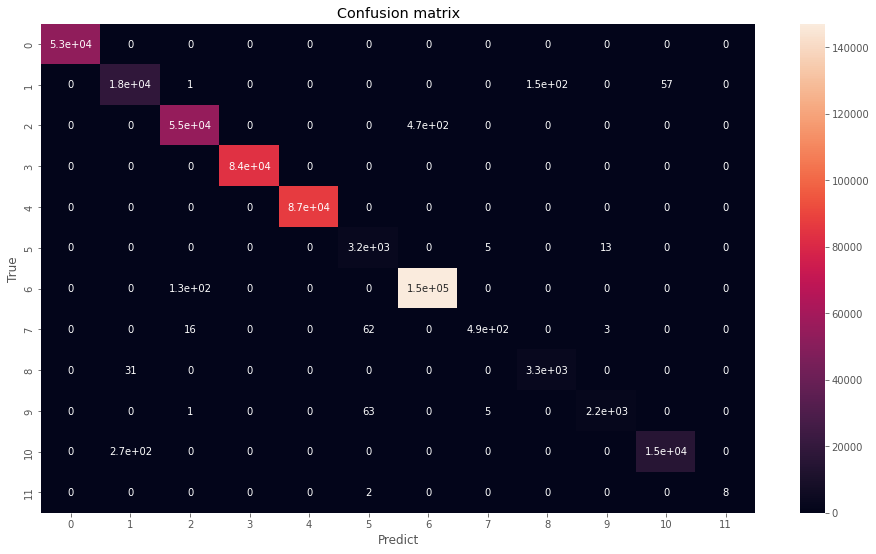

In [ ]:
f,ax=plt.subplots()
sb.heatmap(matrix,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('Confusion matrix') #título
ax.set_xlabel('Predict') #eje x
ax.set_ylabel('True') #eje y

# Prueba

In [ ]:
##Modelado de datos 
modeloP = LogisticRegression()
modeloP.fit(xPrueba,yPrueba)

LogisticRegression()

In [ ]:
probabilidadPrediccionP = modeloP.predict_proba(xPrueba)
probabilidadPrediccionP

array([[3.60089679e-05, 6.93160704e-05, 8.08225081e-05, ...,
        2.59836069e-05, 2.98922211e-05, 5.80322809e-06],
       [4.54942150e-05, 1.04750634e-04, 7.04911124e-05, ...,
        2.98630388e-05, 2.04881044e-05, 1.40541763e-06],
       [8.16116636e-06, 1.83762359e-05, 2.53623307e-05, ...,
        6.11856997e-06, 6.21682531e-06, 1.51095660e-06],
       ...,
       [9.99252023e-01, 9.11575685e-05, 2.81059333e-04, ...,
        3.43243623e-05, 2.27649517e-05, 6.41266406e-06],
       [3.00748252e-05, 5.68095847e-05, 6.60476025e-05, ...,
        2.18041063e-05, 2.50419399e-05, 4.91072524e-06],
       [2.07314713e-04, 3.05865736e-04, 9.97557907e-01, ...,
        4.10269633e-04, 4.04171280e-04, 2.39039938e-05]])

In [ ]:
prediccionP = modeloP.predict(xPrueba)
prediccionP

array([5., 5., 4., ..., 1., 5., 3.])

In [ ]:
print('Desempeño en entrenamiento:', modeloP.score(xPrueba,yPrueba))

Desempeño en entrenamiento: 0.9971865990655134


In [185]:
#Matriz de confusión en entrenamiento 

matrixP=confusion_matrix(y_true = yPrueba,
                 y_pred=prediccionP)

Text(123.0, 0.5, 'True')

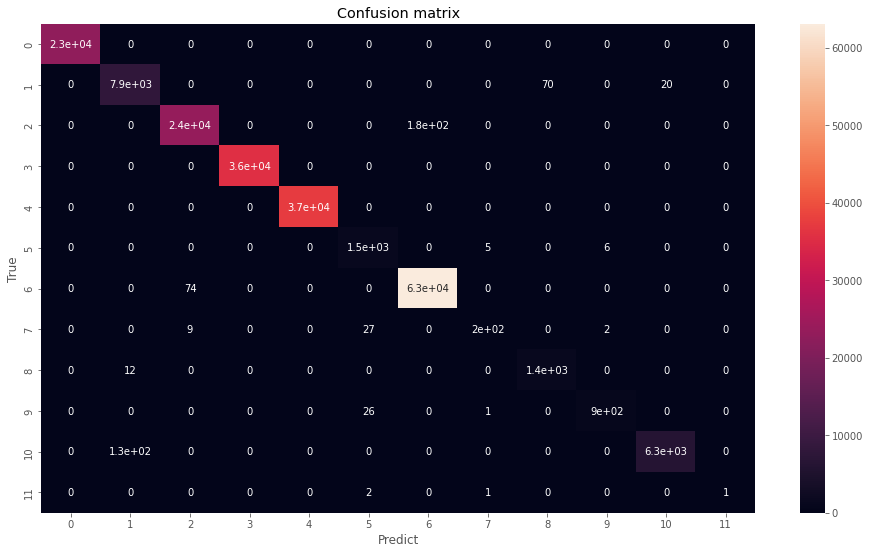

In [186]:
f,ax=plt.subplots()
sb.heatmap(matrixP,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('Confusion matrix') #título
ax.set_xlabel('Predict') #eje x
ax.set_ylabel('True') #eje y